# ODE con python
Vamos a solucionar la ecuación diferencial ordinaria:

$$\frac{dy}{dt} = -y $$
con la condición inicial: $$y(0) = 1 $$

Solución analítica:

$$y(t) = e^{-t} $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f(t, y):
  return -y

#Solución exacta
def y_exacta(t):
  return np.exp(-t)

# Parámetros iniciales
y0 = 1.0     # y(0)
t_min = 0.0
t_max = 5.0

In [8]:
def euler(f, y0, t_array):
  """implementa el método de Euler hacia adelante con paso constante"""
  n = len(t_array)
  y = []
  y.append(y0)
  h = t_array[1] - t_array[0]
  for i in range(n - 1):
    y.append(y[i] + h * f(t_array[i], y[i]))
  return np.array(y)

def rk4(f, y0, t_array):
  """implementa el método de Runge-Kutta de orden 4 con paso constante"""
  n = len(t_array)
  y = []
  y.append(y0)
  h = t_array[1] - t_array[0]

  for i in range(n - 1):
    k1 = f(t_array[i], y[i])
    k2 = f(t_array[i] + 0.5 * h, y[i] + 0.5 * h * k1)
    k3 = f(t_array[i] + 0.5 * h, y[i] + 0.5 * h * k2)
    k4 = f(t_array[i] + h, y[i] + h * k3)

    y.append(y[i] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4))

  return np.array(y)

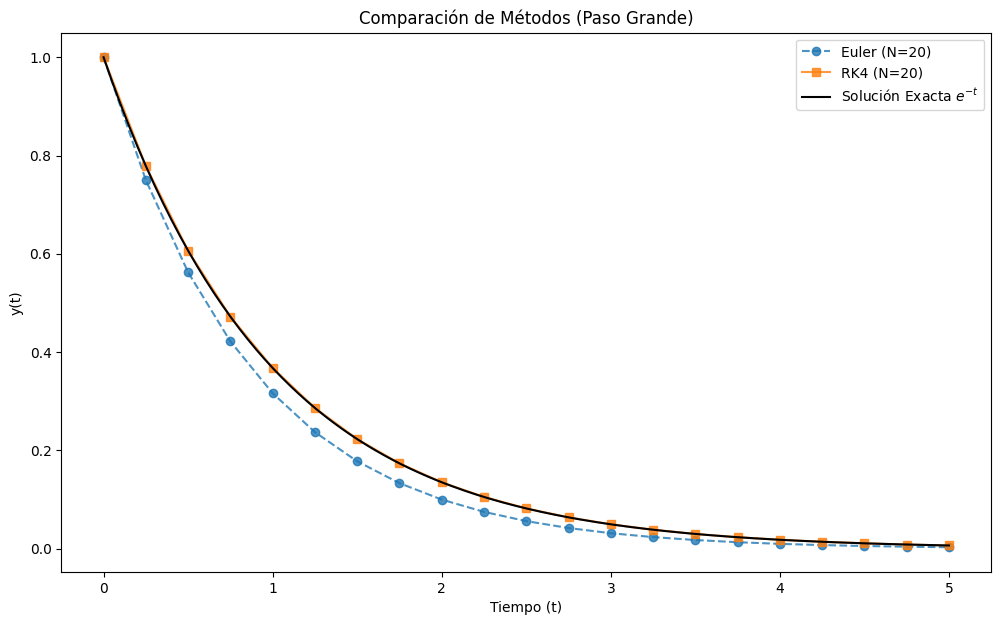

In [9]:
N_pasos = 20
t_eval = np.linspace(t_min, t_max, N_pasos + 1)

# Calcular soluciones
y_euler = euler(f, y0, t_eval)
y_rk4 = rk4(f, y0, t_eval)

# Solución exacta (en una malla fina para una curva suave)
t_exacto = np.linspace(t_min, t_max, 200)
y_ex = y_exacta(t_exacto)

# Gráfico
plt.figure(figsize=(12, 7))
plt.plot(t_eval, y_euler, 'o--', label=f'Euler (N={N_pasos})', alpha=0.8)
plt.plot(t_eval, y_rk4, 's-', label=f'RK4 (N={N_pasos})', alpha=0.8)
plt.plot(t_exacto, y_ex, 'k-', label='Solución Exacta $e^{-t}$')
plt.xlabel('Tiempo (t)')
plt.ylabel('y(t)')
plt.legend()
plt.show()

* Por qué n-1 en el ciclo for?

## Convergencia
Vamos a examinar la convergencia del algoritmo. Siempre se debe analizar la convergencia, es parte de la piedra angular para justificar la "realidad" de los resultados.

In [14]:
# diferentes pasos a probar
N_array = np.array([20, 50, 100, 200, 500, 1000, 2000])

h_array = (t_max - t_min) / N_array

error_euler = []
error_rk4 = []

y_final_ref = y_exacta(t_max)

for N in N_array:
    t_eval_grid = np.linspace(t_min, t_max, N + 1)

    y_eul = euler(f, y0, t_eval_grid)
    y_rk4 = rk4(f, y0, t_eval_grid)

    err_eul = np.abs(y_eul[-1] - y_final_ref)
    err_rk4 = np.abs(y_rk4[-1] - y_final_ref)

    error_euler.append(err_eul)
    error_rk4.append(err_rk4)

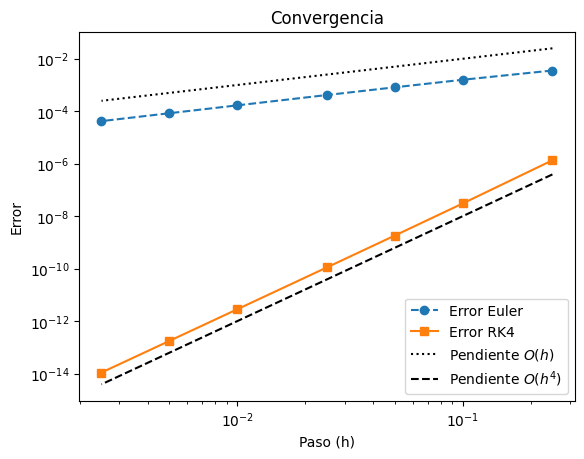

In [15]:
fig, ax  = plt.subplots()

ax.loglog(h_array, error_euler, 'o--', label='Error Euler')
ax.loglog(h_array, error_rk4, 's-', label='Error RK4')

ax.loglog(h_array, 0.1 * h_array**1, 'k:', label='Pendiente $O(h)$')
ax.loglog(h_array, 1e-4 * h_array**4, 'k--', label='Pendiente $O(h^4)$')

ax.set_title('Convergencia')
ax.set_xlabel('Paso (h)')
ax.set_ylabel('Error')
ax.legend()
plt.show()

